ARIMA AND SEASONAL ARIMA

AUTOREGRESSIVE INTEGRATED MOVING AVERAGES

The general process for ARIMA models is the following:
- Visualize the time series data
- Make the time series data stationary
- Plot the correlation and autocorellation charts
- Construct the ARIMA model or Seasonal ARIMA based on the data
- Use the model to make predictions

lets go through these steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
# cleaning up the data
df.columns =['Month',"Sales"]

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
# drop the last two columns
df.dropna(inplace=True)

In [8]:
df.shape

(105, 2)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# convert Month into the datetime format
# in timeseries analysis it should be changed into datetime format
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
# set the index of the data set into the month
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


#### Visualization of the data

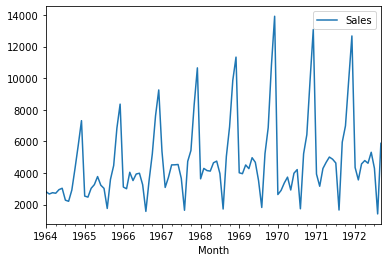

In [14]:
df.plot()
plt.show()

In [15]:
# testing for the stationarity of the data
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result = adfuller(df['Sales'])

In [17]:
# H0: It is non stationary
# H1: It is stationary

In [18]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [19]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276248
p-value : 0.363915771660244
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against the null hypothesis(H0)


### Difference 

In [20]:
df['Sales First Difference'] = df['Sales']-df['Sales'].shift(1)

In [21]:
df['Seasonal  First Difference'] = df['Sales']-df['Sales'].shift(12)

In [22]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [23]:
df.tail()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0
1972-08-01,1413.0,-2885.0,-246.0
1972-09-01,5877.0,4464.0,-74.0


In [42]:
# Agin test dickey fuller test
df.columns= ["Sales",'SalesFD','SeasonalFD']

In [44]:
adfuller_test(df['SeasonalFD'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis(H0)


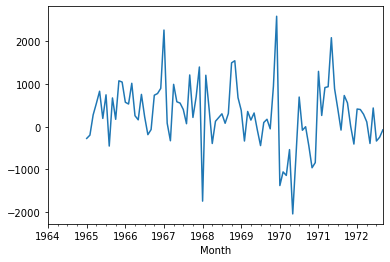

In [46]:
df['SeasonalFD'].plot()
plt.show()

# AUTO REGRESSION MODEL

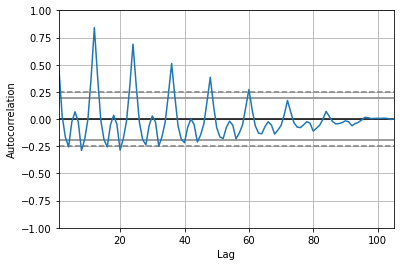

In [52]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.
    - For an AR model, the theoretical PACF "shuts off" past the order of the model. the phrase "shuts off" means that in theory the partail autocorrelations are equal to 0 beyond that point. put another way, the number of non-zero partail autocorrelations gives the order of the AR model. by the "order of the model" we mean the most extreme lag of x that is used a predictor.
- Identification of an MA model is often best done with the ACF rather than  the PACF
    - for an MA model, the theoritical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer patter for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

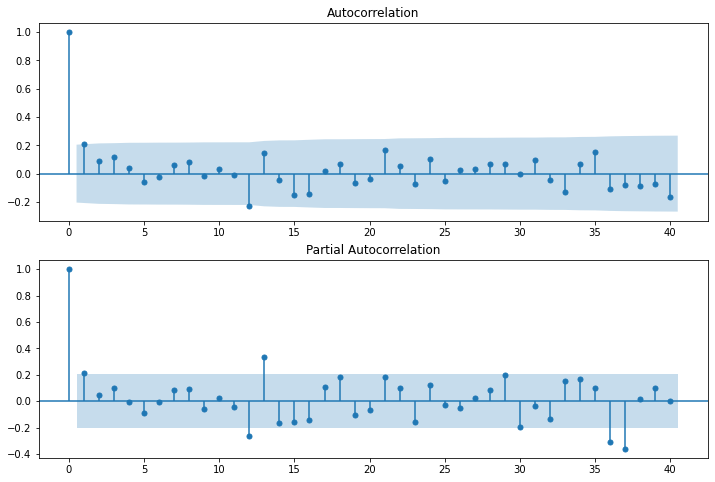

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['SeasonalFD'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['SeasonalFD'].iloc[13:],lags=40, ax=ax2)

In [57]:
# for non-seasonal data
# p=1, d=1 q= 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [59]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 25 Jul 2022   AIC                           1910.251
Time:                        23:51:52   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7844     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

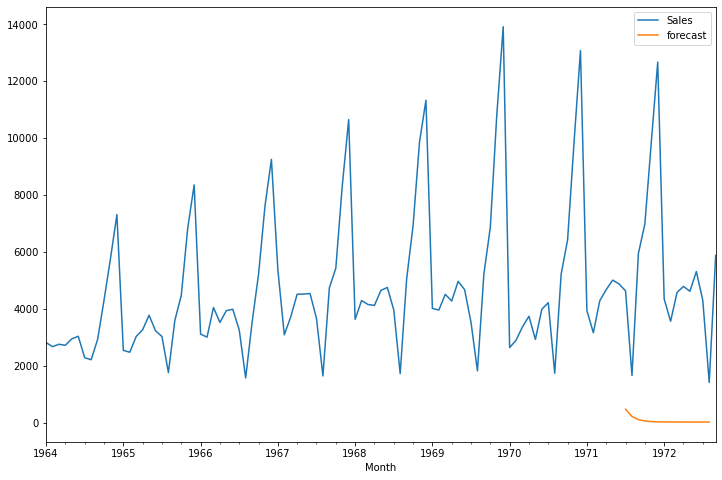

In [61]:
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [62]:
import statsmodels.api as sm

In [69]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

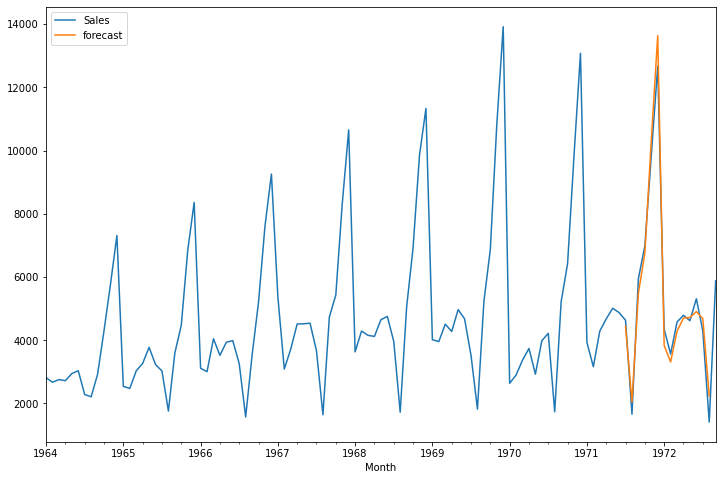

In [70]:
df['forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [71]:
from pandas.tseries.offsets import DateOffset

In [72]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [73]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [74]:
future_datest_df.tail()

,Sales,SalesFD,SeasonalFD,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [75]:
future_df = pd.concat([df, future_datest_df])

<AxesSubplot:>

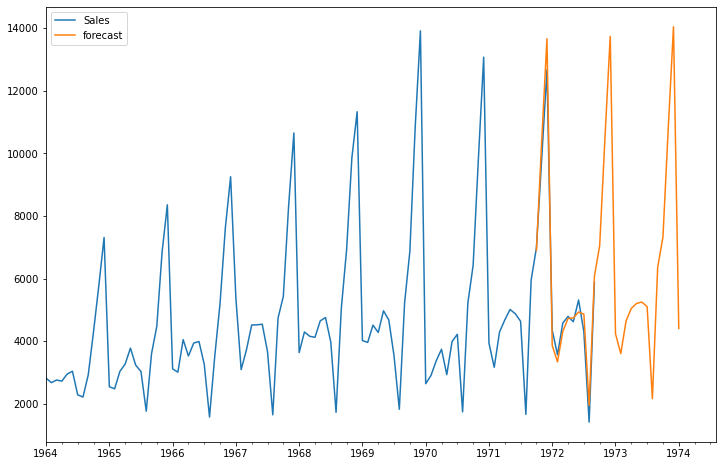

In [79]:
future_df['forecast'] = results.predict(start=93, end=120, dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [82]:
future_df

,Sales,SalesFD,SeasonalFD,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
